In [1]:
# Algorithmic Trading Strategy with Machine Learning

In [39]:
# import_statements

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
# plt.style.use("dark_background")
plt.style.use('classic')


In [15]:
df = pd.read_csv("apple_trade.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/28/2022,163.059998,165.419998,162.429993,165.119995,164.125763,95056600
1,3/1/2022,164.699997,166.600006,161.970001,163.199997,162.217331,83474400
2,3/2/2022,164.389999,167.360001,162.949997,166.559998,165.557098,79724800
3,3/3/2022,168.470001,168.910004,165.550003,166.229996,165.229095,76678400
4,3/4/2022,164.490005,165.550003,162.100006,163.169998,162.187515,83737200
...,...,...,...,...,...,...,...
245,2/17/2023,152.350006,153.000000,150.850006,152.550003,152.550003,59095900
246,2/21/2023,150.199997,151.300003,148.410004,148.479996,148.479996,58867200
247,2/22/2023,148.869995,149.949997,147.160004,148.910004,148.910004,51011300
248,2/23/2023,150.089996,150.339996,147.240005,149.399994,149.399994,48394200


In [5]:
# PRELIMINARY DATA EXPLORATION

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/28/2022,163.059998,165.419998,162.429993,165.119995,164.125763,95056600
1,3/1/2022,164.699997,166.600006,161.970001,163.199997,162.217331,83474400
2,3/2/2022,164.389999,167.360001,162.949997,166.559998,165.557098,79724800
3,3/3/2022,168.470001,168.910004,165.550003,166.229996,165.229095,76678400
4,3/4/2022,164.490005,165.550003,162.100006,163.169998,162.187515,83737200


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
245,2/17/2023,152.350006,153.000000,150.850006,152.550003,152.550003,59095900
246,2/21/2023,150.199997,151.300003,148.410004,148.479996,148.479996,58867200
247,2/22/2023,148.869995,149.949997,147.160004,148.910004,148.910004,51011300
248,2/23/2023,150.089996,150.339996,147.240005,149.399994,149.399994,48394200
249,2/24/2023,147.110001,147.190002,145.720001,146.710007,146.710007,55418200


In [7]:
df.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [8]:
df.duplicated().any()

False

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
# there is no NAN and no duplicated value

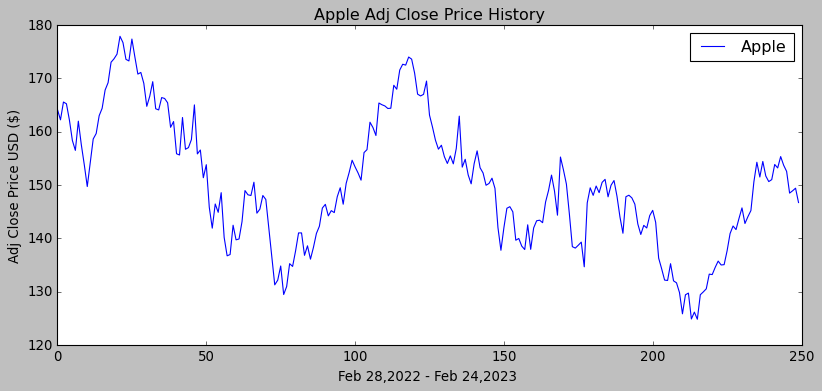

In [40]:
# visualize our data

plt.figure(figsize=(12, 5))
plt.plot(df['Adj Close'], label='Apple')
plt.title('Apple Adj Close Price History')
plt.xlabel("Feb 28,2022 - Feb 24,2023 ")
plt.ylabel("Adj Close Price USD ($)")
plt.legend(loc="upper right")
plt.show()

In [19]:
# simple moving average with window n= 30 days
# using rollign mean pandas method

sma_30 = pd.DataFrame()
sma_30['Adj Close'] = df['Adj Close'].rolling(window=30).mean()
sma_30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
245,143.783938
246,144.419192
247,145.051139
248,145.680115


In [20]:
# simple moving average with window n=100 days
# using rollign mean pandas method

sma_100 = pd.DataFrame()
sma_100['Adj Close'] = df['Adj Close'].rolling(window=100).mean()
sma_100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
245,142.537436
246,142.509459
247,142.504922
248,142.578650


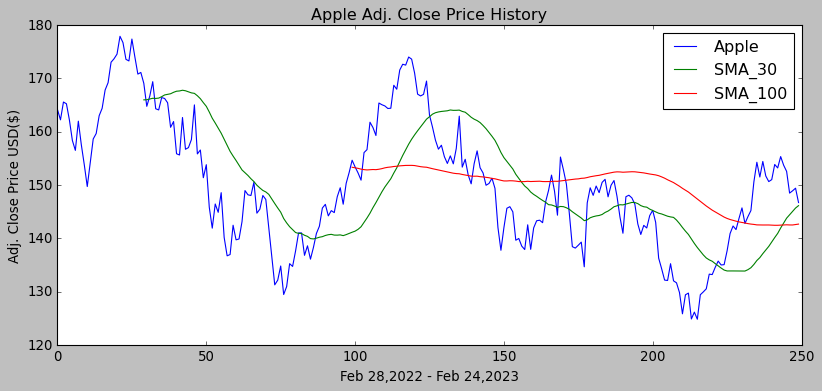

In [41]:
# graphical representation of our new data

plt.figure(figsize=(12,5))
plt.plot(df['Adj Close'], label='Apple')
plt.plot(sma_30['Adj Close'], label='SMA_30')
plt.plot(sma_100['Adj Close'], label='SMA_100')
plt.title("Apple Adj. Close Price History")
plt.xlabel('Feb 28,2022 - Feb 24,2023')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper right')
plt.show()

In [25]:
# Let's store our data in a new dataframe

new_df = pd.DataFrame()
new_df['apple'] = df['Adj Close']
new_df['SMA_30'] = sma_30['Adj Close']
new_df['SMA_100'] = sma_100['Adj Close']
new_df

,apple,SMA_30,SMA_100
0,164.125763,NaN,NaN
1,162.217331,NaN,NaN
2,165.557098,NaN,NaN
3,165.229095,NaN,NaN
4,162.187515,NaN,NaN
...,...,...,...
245,152.550003,143.783938,142.537436
246,148.479996,144.419192,142.509459
247,148.910004,145.051139,142.504922
248,149.399994,145.680115,142.578650


In [34]:
# Creating the signal function to predict when we should buy or sell action

def buySell(new_df):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(new_df)):
    if new_df ['SMA_30'][i] > new_df['SMA_100'][i]:
      if flag != 1:
        sigPriceBuy.append(new_df['apple'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif new_df['SMA_30'][i] < new_df['SMA_100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(new_df['apple'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)
buySell = buySell(new_df)


In [36]:
# buySell = buySell('new_df')
new_df['Buy Signal Price'] = buySell[0]
new_df['Sell Signal Price'] = buySell[1]
# To show the data
new_df

,apple,SMA_30,SMA_100,Buy Signal Price,Sell Signal Price
0,164.125763,NaN,NaN,NaN,NaN
1,162.217331,NaN,NaN,NaN,NaN
2,165.557098,NaN,NaN,NaN,NaN
3,165.229095,NaN,NaN,NaN,NaN
4,162.187515,NaN,NaN,NaN,NaN
...,...,...,...,...,...
245,152.550003,143.783938,142.537436,NaN,NaN
246,148.479996,144.419192,142.509459,NaN,NaN
247,148.910004,145.051139,142.504922,NaN,NaN
248,149.399994,145.680115,142.578650,NaN,NaN


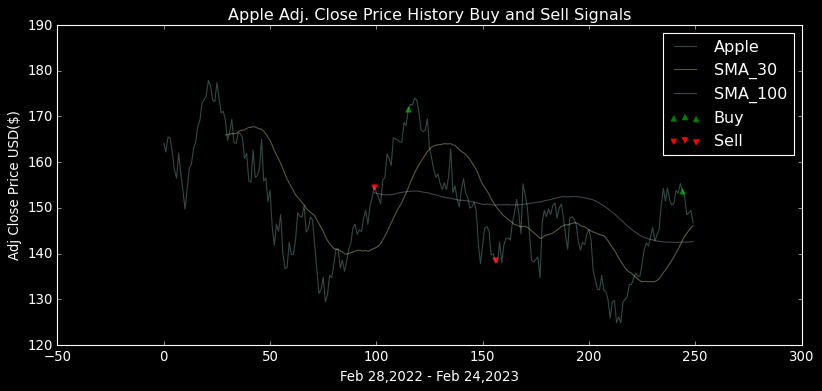

In [38]:
# graphical representation of when we should buy or sell a stock

plt.style.use("dark_background")
plt.figure(figsize=(12,5))
plt.plot(new_df['apple'], label='Apple', alpha=0.35)
plt.plot(new_df['SMA_30'], label='SMA_30', alpha=0.35)
plt.plot(new_df['SMA_100'],label='SMA_100', alpha=0.35)
plt.scatter(new_df.index, new_df['Buy Signal Price'], label ='Buy', marker='^',color='green')
plt.scatter(new_df.index, new_df['Sell Signal Price'],label='Sell', marker='v', color='red')
plt.title('Apple Adj. Close Price History Buy and Sell Signals')
plt.xlabel("Feb 28,2022 - Feb 24,2023")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='upper right')
plt.show()